# #1 欠損値の扱い

In [1]:
import numpy as np

In [5]:
# csvファイルの表示

# !cat 2D_example_data.csv
with open('2D_example_dame.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-326.9730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-293.1415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,NaN
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,NaN,-1.831199
0,1.116025,3.353602



In [6]:
data = np.loadtxt("2D_example_dame.csv", delimiter=",")

In [7]:
y = data[:, 0].astype(int) #1列目がラベル、整数に変換

In [8]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [9]:
X = data[:, 1:3]

In [10]:
X

array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,           nan],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [          nan, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

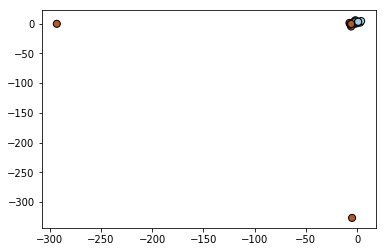

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")

(-10, 10)

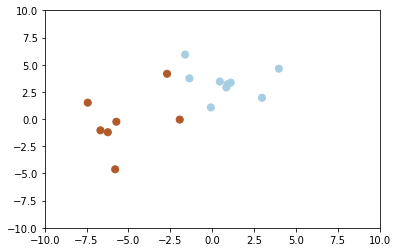

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

In [19]:
#NaNと外れ値を場外する
~np.isnan(X[:, 0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [21]:
~np.isnan(X[:,1])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [22]:
~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True])

In [24]:
# X1にはNaNがない
X1 = X[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]
y1 = y[~np.isnan(X[:, 1]) & ~np.isnan(X[:, 0])]

In [25]:
X1, X1.shape

(array([[-7.428476e+00,  1.509903e+00],
        [ 2.980693e+00,  1.960821e+00],
        [ 3.988255e+00,  4.636389e+00],
        [-5.789437e+00, -4.621614e+00],
        [-4.894447e+00, -3.269730e+02],
        [-1.933949e+00, -4.727600e-02],
        [-1.611771e+00,  5.932201e+00],
        [-6.670152e+00, -1.036282e+00],
        [-2.931415e+02, -1.044750e-01],
        [-7.476200e-02,  1.070002e+00],
        [-2.691793e+00,  4.168774e+00],
        [ 4.611820e-01,  3.453438e+00],
        [-1.354135e+00,  3.751657e+00],
        [-6.229476e+00, -1.209434e+00],
        [-5.719578e+00, -2.435090e-01],
        [ 9.283220e-01,  3.208520e+00],
        [ 8.504750e-01,  2.908955e+00],
        [ 1.116025e+00,  3.353602e+00]]), (18, 2))

In [27]:
(abs(X1[:, 0]) < 10), (abs(X1[:, 1]) < 10)

(array([ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True]))

In [28]:
X2 = X1[(abs(X1[:, 0]) < 10) & (abs(X1[:, 1]) < 10)]
y2 = y1[(abs(X1[:, 0]) < 10) & (abs(X1[:, 1]) < 10)]

In [29]:
X2, X2.shape

(array([[-7.428476,  1.509903],
        [ 2.980693,  1.960821],
        [ 3.988255,  4.636389],
        [-5.789437, -4.621614],
        [-1.933949, -0.047276],
        [-1.611771,  5.932201],
        [-6.670152, -1.036282],
        [-0.074762,  1.070002],
        [-2.691793,  4.168774],
        [ 0.461182,  3.453438],
        [-1.354135,  3.751657],
        [-6.229476, -1.209434],
        [-5.719578, -0.243509],
        [ 0.928322,  3.20852 ],
        [ 0.850475,  2.908955],
        [ 1.116025,  3.353602]]), (16, 2))

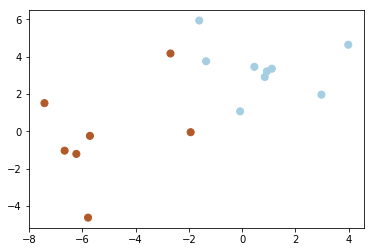

In [30]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50)

In [31]:
# NaNを埋める

In [32]:
from sklearn.preprocessing import Imputer

In [33]:
missing_value_to_mean = Imputer()

In [34]:
missing_value_to_mean.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [35]:
X_new = missing_value_to_mean.transform(X)

In [36]:
X_new

array([[-7.42847600e+00,  1.50990300e+00],
       [ 2.98069300e+00,  1.96082100e+00],
       [ 3.98825500e+00,  4.63638900e+00],
       [-5.78943700e+00, -4.62161400e+00],
       [-4.89444700e+00, -3.26973000e+02],
       [-1.93394900e+00, -4.72760000e-02],
       [-1.61177100e+00,  5.93220100e+00],
       [-6.67015200e+00, -1.03628200e+00],
       [-2.93141500e+02, -1.04475000e-01],
       [-7.47620000e-02,  1.07000200e+00],
       [-2.69179300e+00,  4.16877400e+00],
       [ 4.61182000e-01,  3.45343800e+00],
       [-1.35413500e+00,  3.75165700e+00],
       [-6.22947600e+00, -1.20943400e+00],
       [ 2.77859400e+00, -1.57953962e+01],
       [-5.71957800e+00, -2.43509000e-01],
       [ 9.28322000e-01,  3.20852000e+00],
       [ 8.50475000e-01,  2.90895500e+00],
       [-1.70755753e+01, -1.83119900e+00],
       [ 1.11602500e+00,  3.35360200e+00]])

In [37]:
# 平均値でNaNを埋める場合は外れ値を除外してからする
# 中央値で埋める

missing_value_to_median = Imputer(strategy='median')
missing_value_to_median.fit(X)
X_new2 = missing_value_to_median.transform(X)
X_new2

array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,  1.509903e+00],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [-1.611771e+00, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

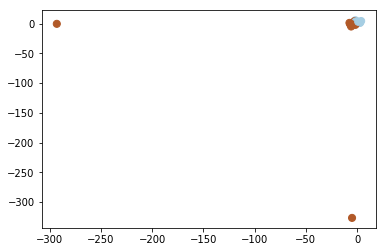

In [40]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y, s=50)

# #2 特徴抽出

In [41]:
import urllib.request

In [42]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", "allice.txt")

('allice.txt', <http.client.HTTPMessage at 0x7f6f9c35cda0>)

In [43]:
with open('allice.txt') as f:
    print(f.read()[710:1400])



CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, ‘and what is the use of a book,’ thought Alice ‘without pictures or
conversations?’

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice 


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
txt_vec = CountVectorizer(input='filename')

In [48]:
txt_vec.fit(['allice.txt'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='filename',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
# 特徴量を出力
txt_vec.get_feature_names()[100:120]

['along',
 'aloud',
 'already',
 'also',
 'alteration',
 'altered',
 'alternate',
 'alternately',
 'altogether',
 'always',
 'am',
 'ambition',
 'among',
 'an',
 'ancient',
 'and',
 'anger',
 'angrily',
 'angry',
 'animal']

In [51]:
len(txt_vec.get_feature_names()) # 単語数を表示

3019

In [54]:
allice_vec = txt_vec.transform(['allice.txt'])

In [55]:
allice_vec

<1x3019 sparse matrix of type '<class 'numpy.int64'>'
	with 3019 stored elements in Compressed Sparse Row format>

In [56]:
allice_vec.shape

(1, 3019)

In [57]:
allice_vec = allice_vec.toarray()

In [58]:
allice_vec[0, 100:120]

array([  6,   5,   3,   4,   1,   1,   1,   1,   5,  13,  16,   1,  12,
        61,   1, 940,   2,   9,   5,   2])

In [59]:
# 　ワードと出現回数を表示
for word, count in zip(txt_vec.get_feature_names()[100:120], allice_vec[0, 100:120]):
    print(word, count)

along 6
aloud 5
already 3
also 4
alteration 1
altered 1
alternate 1
alternately 1
altogether 5
always 13
am 16
ambition 1
among 12
an 61
ancient 1
and 940
anger 2
angrily 9
angry 5
animal 2


# #3 特徴抽出、画像データ

In [60]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')

/opt/conda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/opt/conda/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


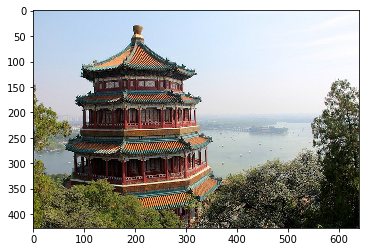

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(china)

In [64]:
china.shape

(427, 640, 3)

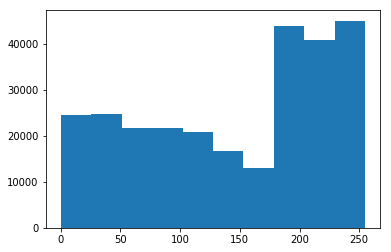

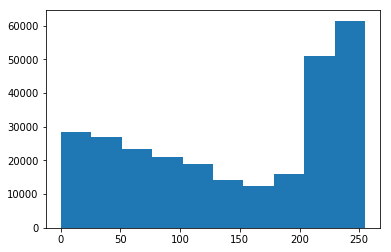

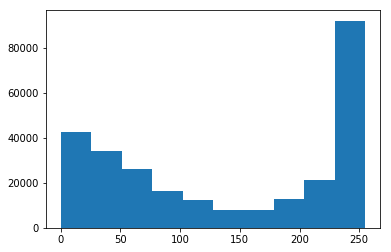

In [66]:
histR = plt.hist(china[:,:,0].ravel(), bins=10)
plt.show()
histG = plt.hist(china[:,:,1].ravel(), bins=10)
plt.show()
histB = plt.hist(china[:,:,2].ravel(), bins=10)
plt.show()

In [68]:
import numpy as np
histRGBcat = np.hstack((histR[0], histG[0], histB[0]))

<BarContainer object of 30 artists>

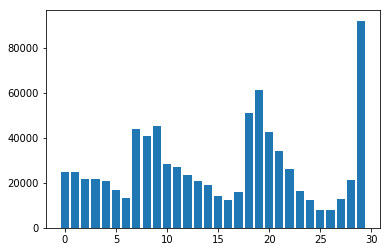

In [69]:
plt.bar(range(len(histRGBcat)), histRGBcat)

# #4 特徴選択

In [2]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [4]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# ベストな特徴だけを選択する
from sklearn.feature_selection import SelectKBest # 上位k個
from sklearn.feature_selection import chi2 # カイ２乗基準

In [8]:
skb = SelectKBest(chi2, k=20)

In [9]:
skb.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x7fc0e1e05c80>)

In [13]:
X_train_new = skb.transform(X_train)

In [14]:
X_train.shape, X_train_new.shape

((455, 30), (455, 20))

In [17]:
# どの次元が使われたのか
skb.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [20]:
data.feature_names[skb.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype='<U23')

In [21]:
# 使われなかった次元を調べる
data.feature_names[~skb.get_support()]

array(['mean smoothness', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst fractal dimension'], dtype='<U23')

In [39]:
# 特徴量を30から１つのなかで、最適な特徴量の数を決める

from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [40]:
from sklearn.model_selection import StratifiedKFold


k_range = np.arange(1, 31)
scores = []
std = []

for k in k_range:
    ss = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
    score = []
    for train_index, val_index in ss.split(X_train, y_train):
        
        X_train2, X_val = X[train_index], X[val_index]
        y_train2, y_val = y[train_index], y[val_index]
        
        skb = SelectKBest(chi2, k=k)
        
        skb.fit(X_train2, y_train2)
        
        X_new_train2 = skb.transform(X_train2)
        X_new_val = skb.transform(X_val)
        
        clf.fit(X_new_train2, y_train2)
        score.append(clf.score(X_new_val, y_val))
        
    scores.append(np.array(score).mean())
    std.append(np.array(score).std())
    
scores = np.array(scores)
std = np.array(std)

In [41]:
scores


array([0.90777778, 0.93198068, 0.9231401 , 0.91879227, 0.9342029 ,
       0.9384058 , 0.94280193, 0.94497585, 0.95164251, 0.95830918,
       0.95613527, 0.95613527, 0.95391304, 0.95391304, 0.95391304,
       0.95391304, 0.95391304, 0.95826087, 0.95826087, 0.95826087,
       0.95608696, 0.95826087, 0.95608696, 0.95391304, 0.95608696,
       0.962657  , 0.962657  , 0.962657  , 0.962657  , 0.962657  ])

Text(0,0.5,'accuracy')

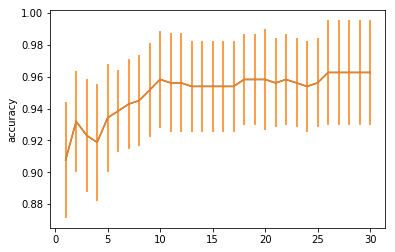

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(k_range, scores)
plt.errorbar(k_range, scores, yerr=std)
plt.ylabel("accuracy")

Text(0,0.5,'error rate')

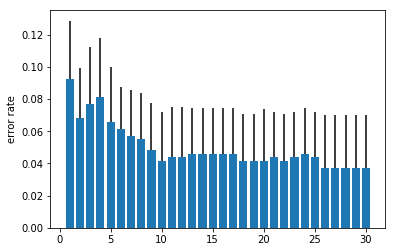

In [43]:
# 標準偏差が1を超えてしまう場合は
plt.bar(k_range, 1-scores, yerr=[np.zeros(std.shape), std])
plt.ylabel("error rate")

In [45]:
best_k = k_range[np.argmax(scores)]
best_k

26

In [46]:
skb = SelectKBest(chi2, k=best_k)

In [48]:
skb.fit(X_train, y_train)

SelectKBest(k=26, score_func=<function chi2 at 0x7fc0e1e05c80>)

In [49]:
# 最適な次元数にする
X_train_best = skb.transform(X_train)
X_test_best = skb.transform(X_test)

In [50]:
clf.fit(X_train_best, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
clf.score(X_test_best, y_test)

0.956140350877193

In [52]:
# 特徴選択をしない場合
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

In [53]:
# 性能は変わらないが、少ない特徴量で同じ性能を保てれた

# #5特徴変換

In [55]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [58]:
import pandas as pd 
from pandas.tools.plotting import scatter_matrix

In [59]:
df = pd.DataFrame(data.data[:, 0:10], columns=data.feature_names[0:10])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d3032390>,
      dtype=object)

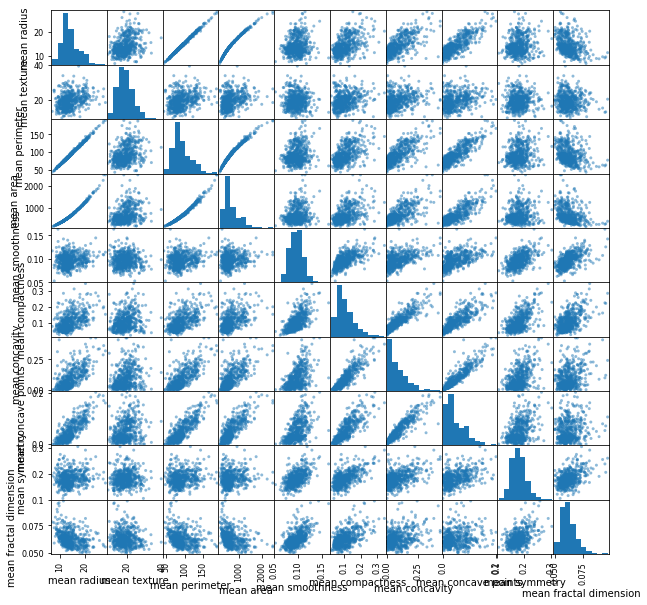

In [60]:
#　相関を見る
scatter_matrix(df, figsize=(10, 10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d14b88d0>,
      dtype=object)

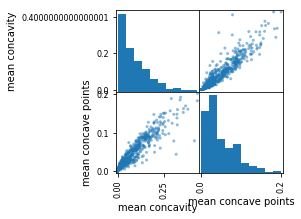

In [62]:
# 特徴量の6,7番目をみて見る
df = pd.DataFrame(data.data[:, 6:8], columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3, 3))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d1758860>,
      dtype=object)

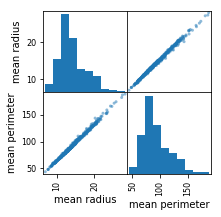

In [66]:
df = pd.DataFrame(data.data[:, [0,2]], columns=data.feature_names[[0,2]])
scatter_matrix(df, figsize=(3, 3))

In [68]:
X = data.data[:, [0,2]]
y = data.target
names  =data.feature_names[[0, 2]]

In [69]:
X.shape, y.shape

((569, 2), (569,))

Text(0,0.5,'mean perimeter')

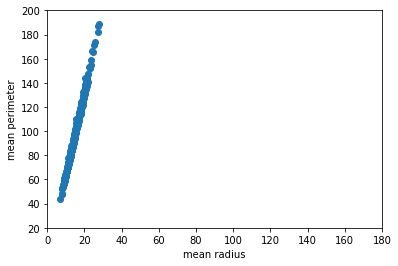

In [70]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA()

In [73]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [74]:
X_new = pca.transform(X)

(-60, 120)

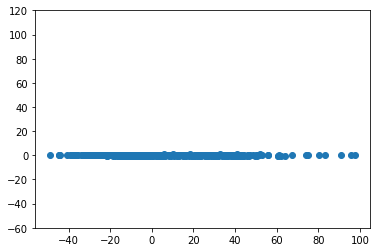

In [75]:
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.ylim(-60, 120)

In [77]:
pca.explained_variance_

array([6.02807278e+02, 5.21213668e-02])

In [78]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([9.99913543e-01, 8.64569199e-05])